# Mosquito Sinks and Sources Detection

# Setup

In [1]:
import pandas as pd
import numpy as np

In [2]:
transitions = pd.read_csv('data/data_509/kernel_regular_5000.csv', header=None)
locations = pd.read_csv('data/data_509/stp_all_sites_v3.csv')

# A Peek at the Data

In [3]:
display(transitions.shape, transitions.head())

(509, 509)

,0,1,2,3,4,5,6,7,8,9,...,499,500,501,502,503,504,505,506,507,508
0,0.7980,0.0060,0.0050,0.0035,0.0075,0.0010,0.0030,0.0030,0.0010,0.0010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0060,0.7465,0.0145,0.0120,0.0070,0.0035,0.0035,0.0055,0.0030,0.0050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0050,0.0145,0.7540,0.0160,0.0070,0.0040,0.0045,0.0070,0.0015,0.0035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0035,0.0120,0.0160,0.7705,0.0035,0.0060,0.0035,0.0025,0.0045,0.0035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0075,0.0070,0.0070,0.0035,0.7535,0.0035,0.0040,0.0015,0.0035,0.0060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
transitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Columns: 509 entries, 0 to 508
dtypes: float64(506), int64(3)
memory usage: 2.0 MB


In [5]:
display(locations.shape, locations.head())

(509, 3)

,lon,lat,pop
0,7.42917,1.61930,222
1,7.41421,1.63409,12
2,7.41390,1.63602,8
3,7.41219,1.63492,16
4,7.42591,1.64041,23


In [6]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lon     509 non-null    float64
 1   lat     509 non-null    float64
 2   pop     509 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 12.1 KB


# The Detector Class - Example Usage

In [7]:
import cluster_plots as cp
import detector

In [8]:
d = detector.Detector(transitions, 
                      locations,
                      ss_vals=10000,
                      as_df=True,
                      n_clusters=8, 
                      random_state=0)

In [9]:
# At what step is the system is steady-state?
d.ss_step

1090

In [10]:
# Let's verify that this is steady state
np.all(np.abs(d.migrate(d.ss_step) - d.migrate(d.ss_step + 1)) <= 0.05)

True

In [11]:
# If we start at time step 0, what happens at steady-state?
d.run()
display(d.clabels().head(),\
        d.results().head()
)

,lon,lat,pop,cid
0,7.42917,1.61930,222,1
1,7.41421,1.63409,12,1
2,7.41390,1.63602,8,1
3,7.41219,1.63492,16,1
4,7.42591,1.64041,23,1


,num_in,num_out,prp_in,prp_out,com,type
0,23310.9,7001.29,0.769027,0.230973,"[96, 98, 99, 100, 101, 102, 103, 104, 105, 106...",sink
1,3219.56,3219.56,0.5,0.5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",bridge
2,3759.21,589.135,0.864515,0.135485,"[89, 416, 432, 433, 434, 435, 436, 437, 438, 4...",sink
3,11847.7,10882.7,0.521227,0.478773,"[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6...",bridge
4,7531.4,524.251,0.934921,0.0650786,"[299, 402, 403, 404, 405, 406, 407, 408, 409, ...",sink


In [12]:
# The entries below should only slightly change
d.run(0, d.ss_step + 5).results().head()

,num_in,num_out,prp_in,prp_out,com,type
0,23310.2,7001.43,0.769019,0.230981,"[96, 98, 99, 100, 101, 102, 103, 104, 105, 106...",sink
1,3219.56,3219.56,0.5,0.5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",bridge
2,3761.07,588.8,0.86464,0.13536,"[89, 416, 432, 433, 434, 435, 436, 437, 438, 4...",sink
3,11847.4,10882.8,0.521219,0.478781,"[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6...",bridge
4,7532.24,524.104,0.934945,0.0650548,"[299, 402, 403, 404, 405, 406, 407, 408, 409, ...",sink


In [13]:
# What happens if we stop before steady-state?
d.run(0, 100).results().head()

,num_in,num_out,prp_in,prp_out,com,type
0,25232.6,6575.59,0.793274,0.206726,"[96, 98, 99, 100, 101, 102, 103, 104, 105, 106...",sink
1,3194.64,3194.64,0.5,0.5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",bridge
2,1400.11,990.929,0.585566,0.414434,"[89, 416, 432, 433, 434, 435, 436, 437, 438, 4...",bridge
3,9688.88,11205.2,0.463714,0.536286,"[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6...",bridge
4,5001.86,1095.72,0.820302,0.179698,"[299, 402, 403, 404, 405, 406, 407, 408, 409, ...",sink


In [14]:
# What happens from time step 1000 to steady-state?
d.run(1000).results().head()

,num_in,num_out,prp_in,prp_out,com,type
0,0,16.6096,0,1,"[96, 98, 99, 100, 101, 102, 103, 104, 105, 106...",source
1,0.0198918,0.0198918,0.5,0.5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",bridge
2,46.1905,0,1,0,"[89, 416, 432, 433, 434, 435, 436, 437, 438, 4...",sink
3,0,6.81528,0,1,"[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6...",source
4,20.5267,0,1,0,"[299, 402, 403, 404, 405, 406, 407, 408, 409, ...",sink


In [15]:
# How many bridges, sinks, and sources do we have?
d.results().groupby('type').size()

type
bridge    1
sink      2
source    5
dtype: int64

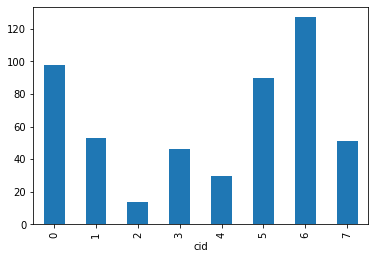

In [16]:
# What are the sizes of each community?
d.clabels().groupby('cid').size().plot(kind='bar')

# Plots

### First, let's see where the data is geographically:

In [17]:
import folium
import folium.plugins

In [18]:
COORDS = (7.42917, 1.61930)
folimp = folium.Map(locations=COORDS, zoom_start=13)
points = locations[['lat', 'lon']].astype('float').values
heatmp = folium.plugins.HeatMap(points.tolist(), radius=10)
folimp.add_child(heatmp)

In [19]:
cluster = folium.plugins.MarkerCluster()
for _, r in locations[['lat', 'lon']].iterrows():
    cluster.add_child(folium.Marker([float(r['lat']), float(r['lon'])]))
folimp = folium.Map(locations=COORDS, zoom_start=13)
folimp.add_child(cluster)
folimp

In [20]:
# Looks like there are two islands that are independent. Let's split 
# them up, and analyze each individually:
d.run()
cids = d.clabels()
prps = d.results()

principe_locs = cids[cids['lat'] > 1.25]
principe_tmtx = transitions.iloc[principe_locs.index, principe_locs.index]
principe_coms = prps[prps.index.isin(principe_locs['cid'].unique())]

sao_tome_locs = cids[cids['lat'] < 0.50]
sao_tome_tmtx = transitions.iloc[sao_tome_locs.index, sao_tome_locs.index]
sao_tome_coms = prps[prps.index.isin(sao_tome_locs['cid'].unique())]

### Now let's use a graph to visualize the network:

In [21]:
import geojson

# To plot a background, convert the SHP file(s) to a geojson file
# Use: https://mygeodata.cloud/converter/shp-to-geojson
with open("geojson/STP.geojson") as json_file:
    json_data = geojson.load(json_file)

poly = json_data['features']

In [22]:
# Retrieves the polygon coordinates for the background 
principe = { 'type' : 'MultiPolygon', 'coordinates' : poly[0]['geometry']['coordinates'] }
sao_tome = { 'type' : 'MultiPolygon', 'coordinates' : poly[1]['geometry']['coordinates'] }
all_data = { 'type' : 'MultiPolygon', 'coordinates' : poly[0]['geometry']['coordinates'][:] }
all_data['coordinates'].extend(poly[1]['geometry']['coordinates'][:])

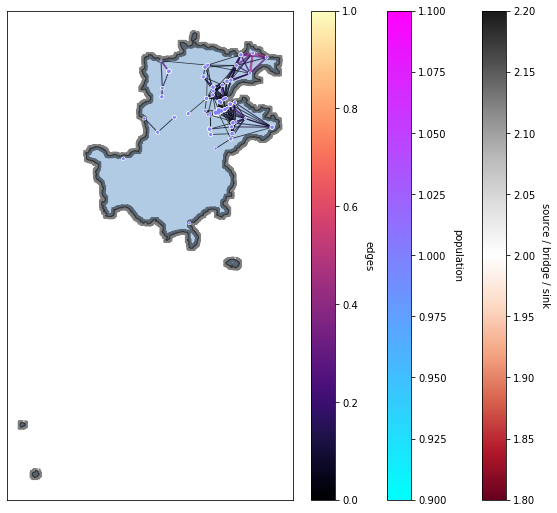

In [23]:
cp.plot_data(principe_tmtx, principe_locs, principe_coms,\
          nodes_fn=lambda x: x**(1/3),
          bordr_mu=3,
          min_prob=0.007,
          edges_mu=100,
          bgrd_crd=principe,
          bgbd_lwd=5,
          fig_size=(10,9),
          plt_bbar=True,
          plt_pbar=True,
          plt_sbar=True
)

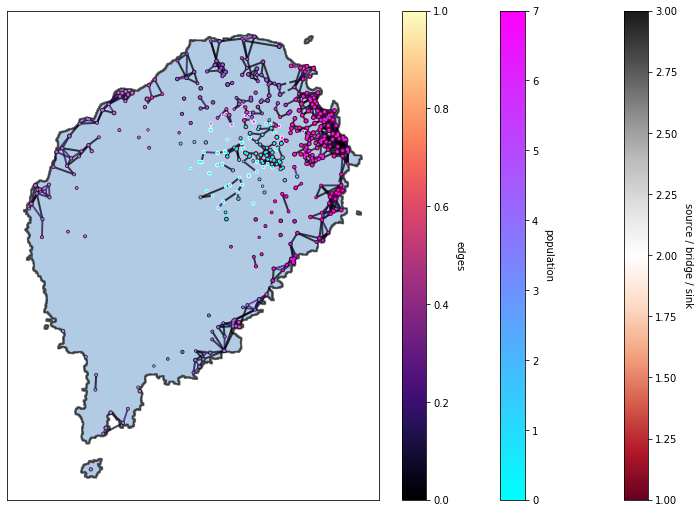

In [24]:
cp.plot_data(sao_tome_tmtx, sao_tome_locs, sao_tome_coms,\
          nodes_fn=lambda x: x**(1/6),
          bordr_mu=5,
          edges_fn=np.log10,
          min_prob=0.009,
          edges_mu=1,
          bgrd_crd=sao_tome,
          bgbd_lwd=2,
          fig_size=(13,9),
          plt_bbar=True,
          plt_pbar=True,
          plt_sbar=True,
)

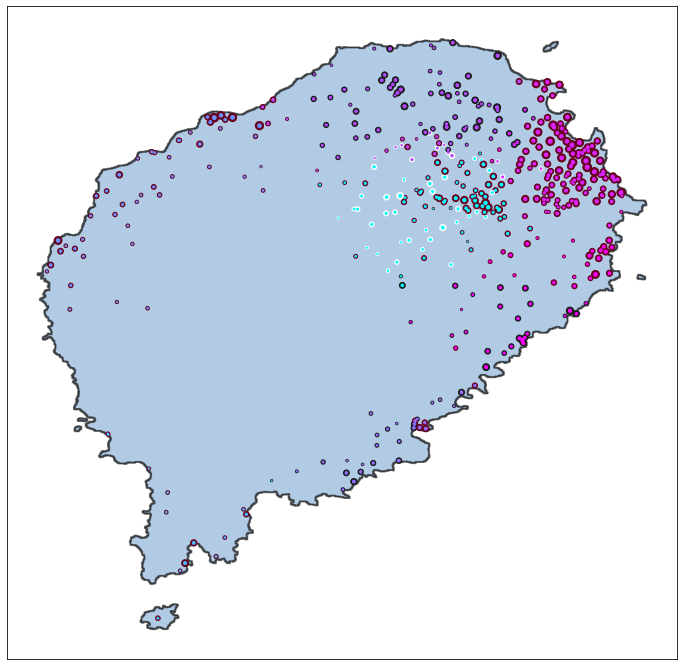

In [25]:
cp.plot_data(sao_tome_tmtx, sao_tome_locs, sao_tome_coms,\
          nodes_fn=lambda x: x**(1/3),
          bordr_mu=5,
          edges_fn=np.log10,
          min_prob=1,
          edges_mu=1,
          bgrd_crd=sao_tome,
          bgbd_lwd=2,
          fig_size=(12,12)
)

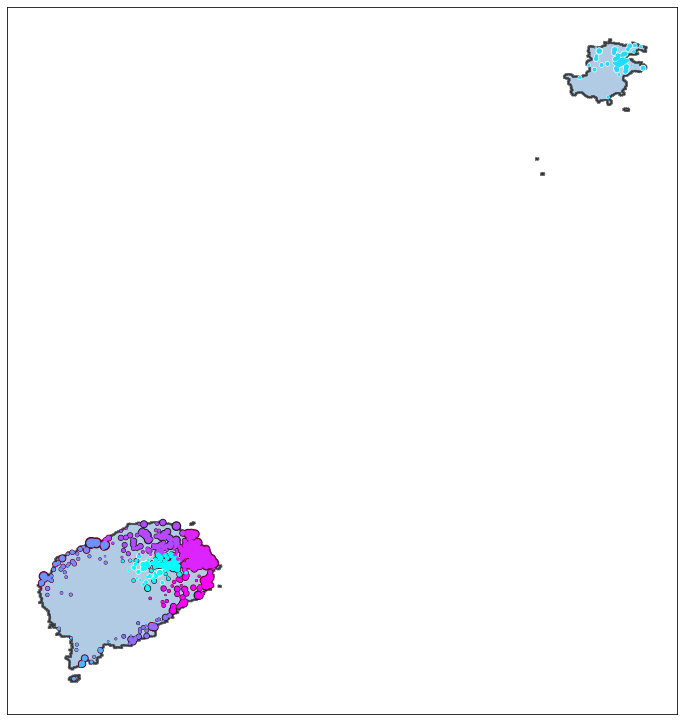

In [26]:
cp.plot_data(transitions, d.clabels(), d.results(),\
          nodes_fn=np.sqrt,
          bordr_mu=2,
          edges_fn=np.log10,
          min_prob=1,
          edges_mu=2,
          bgrd_crd=all_data,
          bgbd_lwd=2,
          fig_size=(12,13),
 )

# References

1. Polygon Plotting: https://gis.stackexchange.com/questions/93136/how-to-plot-geo-data-using-matplotlib-python/93201#93201

2. SHP file: https://data.humdata.org/dataset/sao-tome-and-principe-administrative-boundaries

3. Colormaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html